In [1]:
import sklearn
import pandas as pd
df_test = pd.read_csv("titanic_data/test.csv")
df_train = pd.read_csv("titanic_data/train.csv")
df = pd.concat([df_test,df_train])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [2]:
# sterg datele cu NaN - survived
# de facut graphing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [3]:
df = df.drop(['Name'], axis=1)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df['Ticket']= label_encoder.fit_transform(df['Ticket'])
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,1,34.5,0,0,376,7.8292,NaN,1,NaN
1,893,3,0,47.0,1,0,582,7.0000,NaN,2,NaN
2,894,2,1,62.0,0,0,184,9.6875,NaN,1,NaN
3,895,3,1,27.0,0,0,366,8.6625,NaN,2,NaN
4,896,3,0,22.0,1,1,338,12.2875,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,130,13.0000,NaN,2,0.0
887,888,1,0,19.0,0,0,18,30.0000,B42,2,1.0
888,889,3,0,NaN,1,2,923,23.4500,NaN,2,0.0
889,890,1,1,26.0,0,0,11,30.0000,C148,0,1.0


<Axes: >

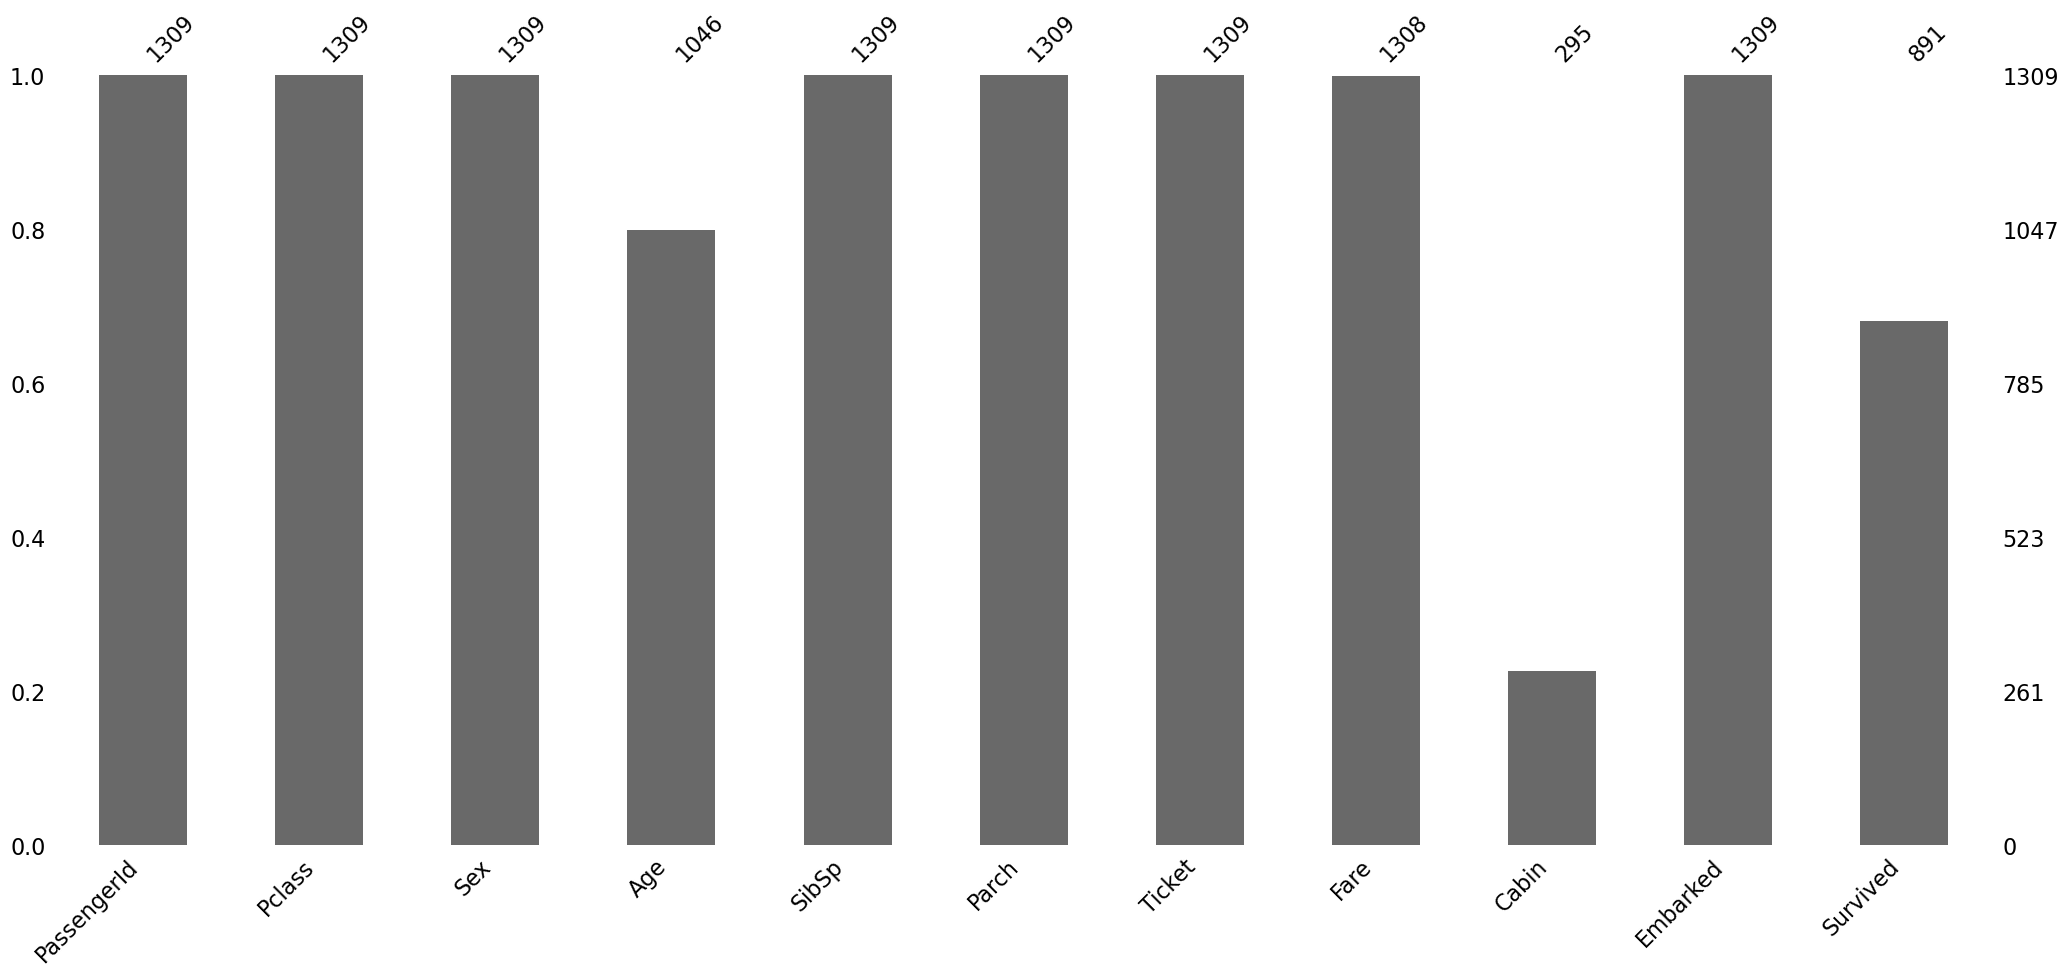

In [5]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.bar(df)

As seen, we got a lot of missing for "Age", "Cabin" and "Survived" columns

<Axes: >

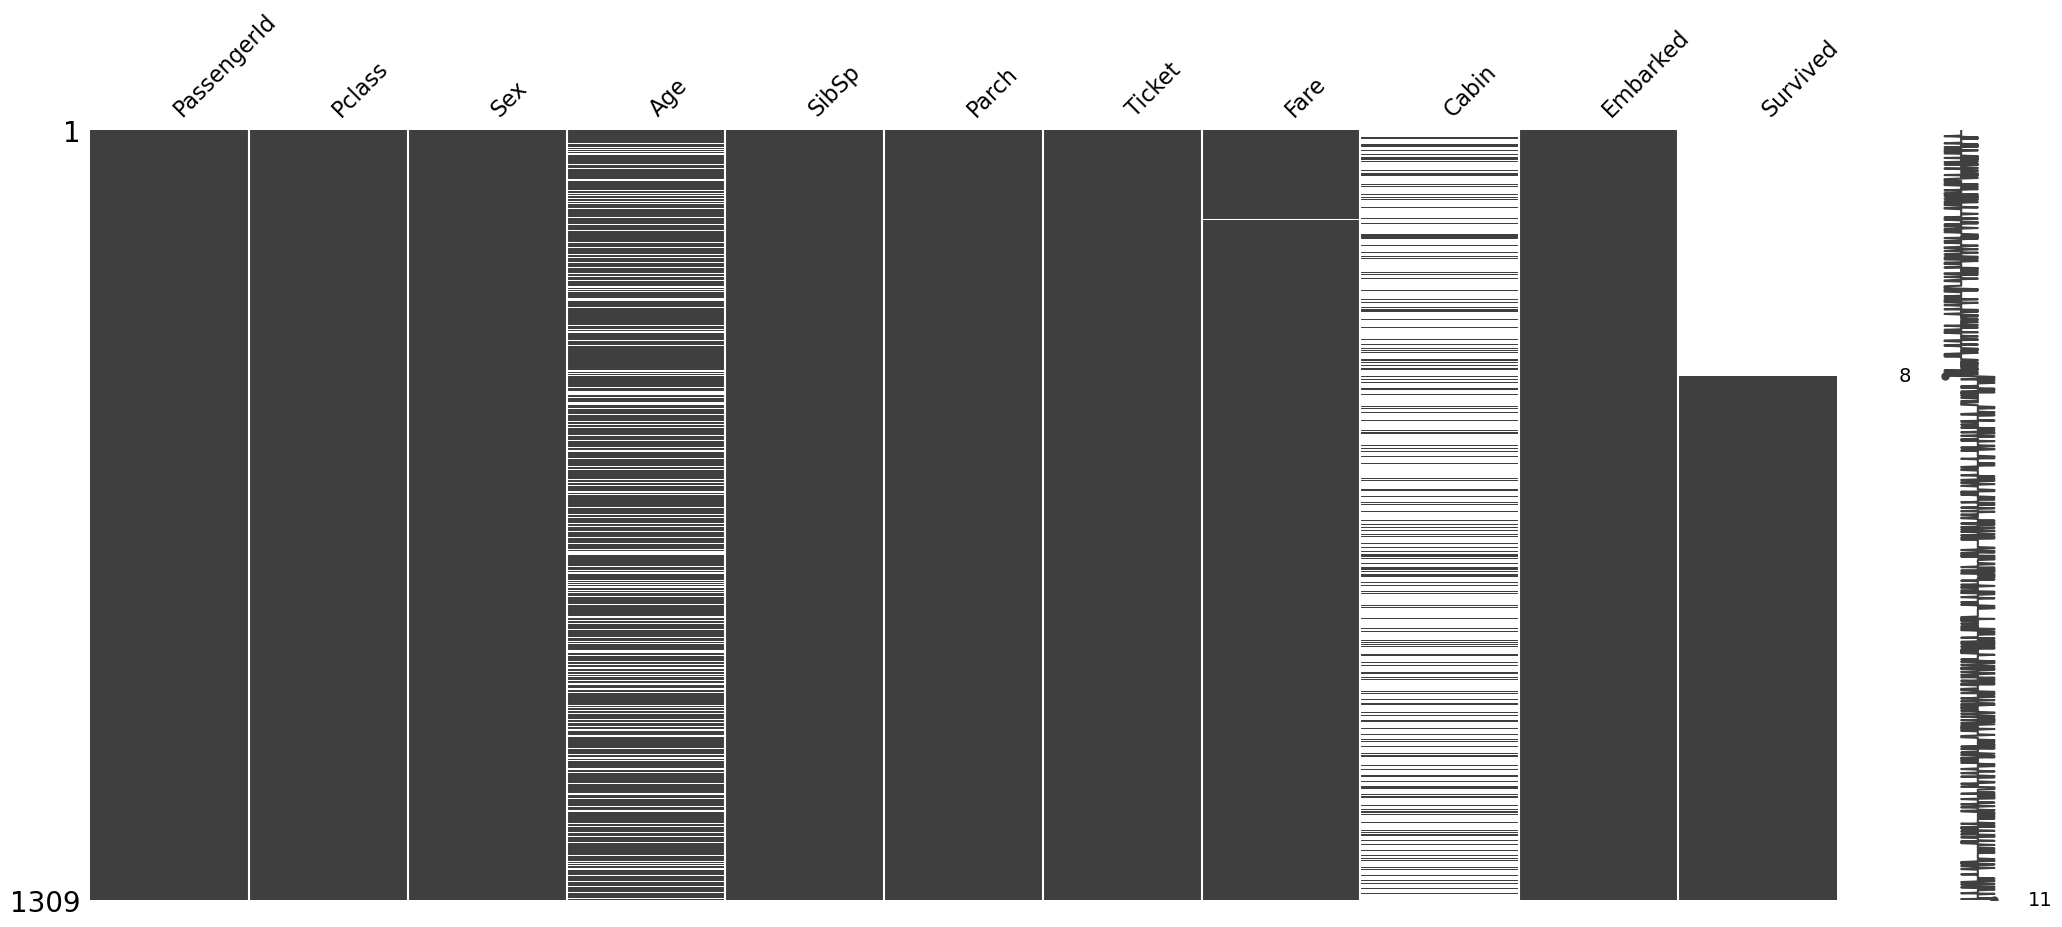

In [6]:
msno.matrix(df)

Thus, because "Survived" column is our target, we will drop the NaN rows. "Cabin" column is lacking a lot of data, thus it would be worthless to use MICE or Interpolation. It is more useful to just drop the NaN values. For the "Age" column, we will use MICE though.

## Missing Values Imputation

C:\Users\Max\AppData\Local\Temp\ipykernel_11856\2703411839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cabin']= label_encoder.fit_transform(df2['Cabin'])


<Axes: >

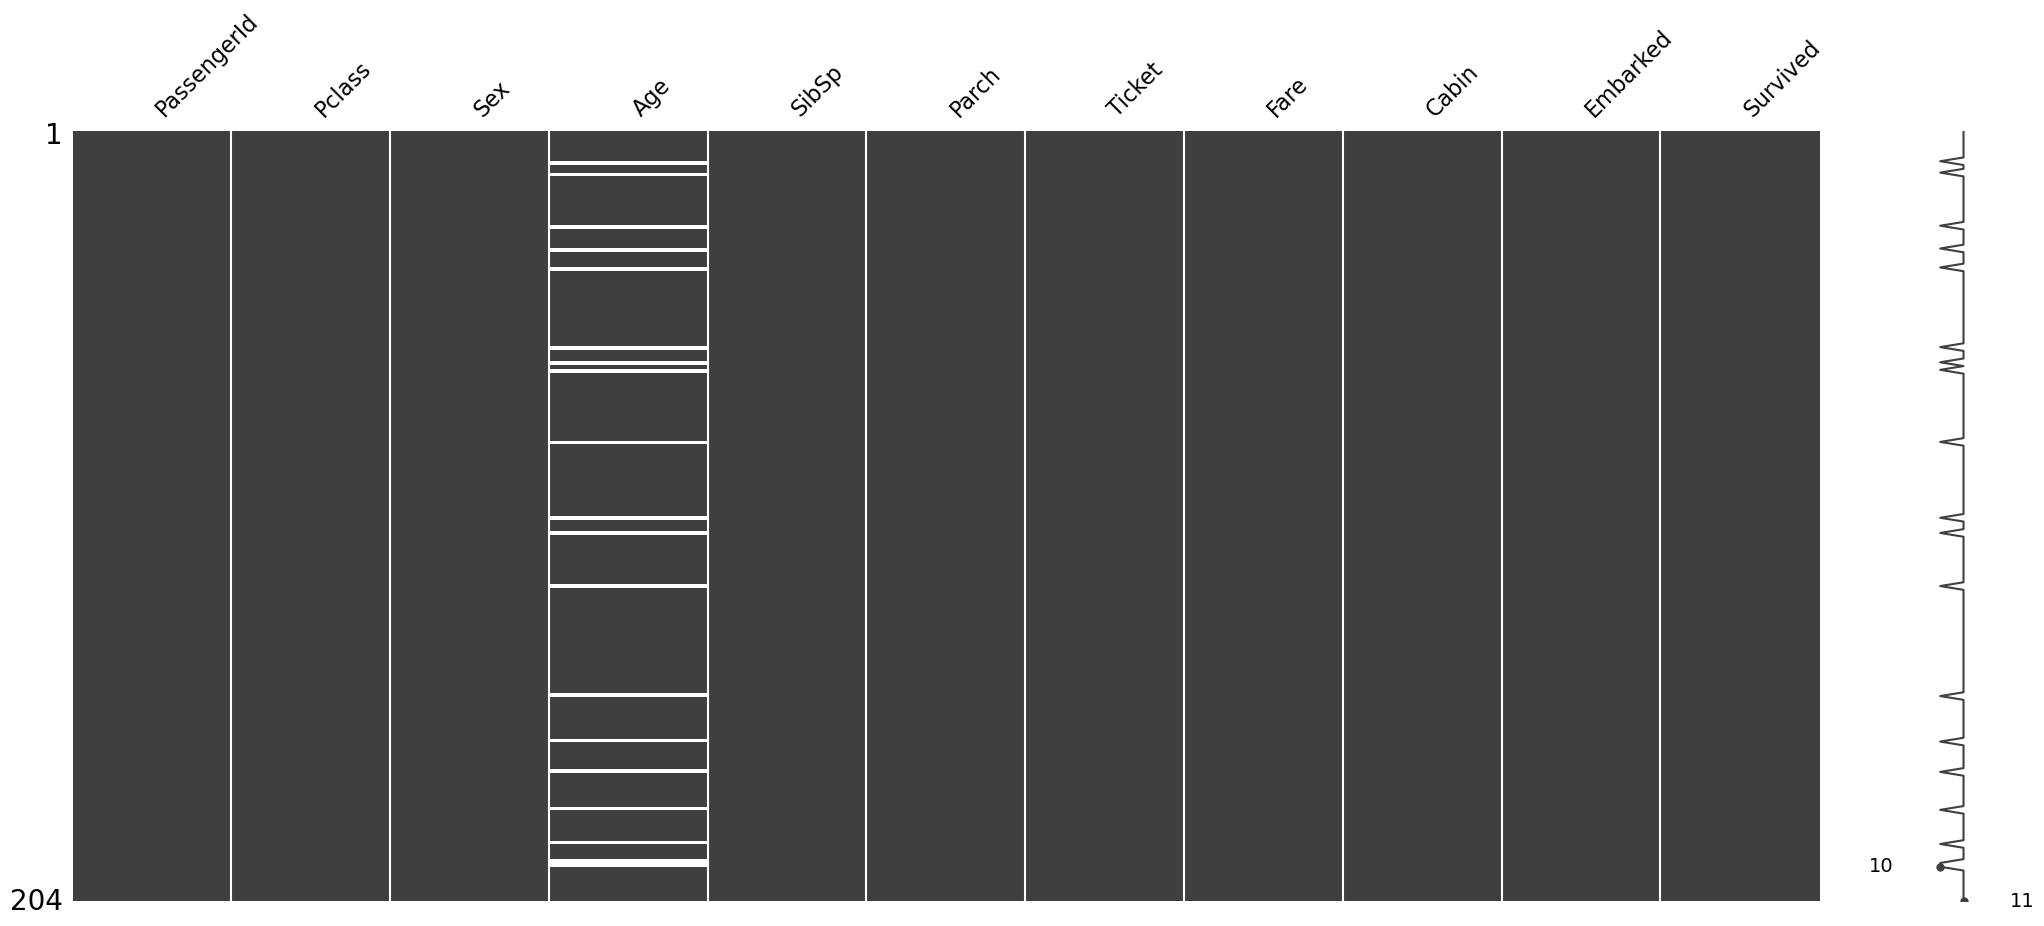

In [16]:
df2=df.dropna(subset=['Survived','Cabin'])
df2['Cabin']= label_encoder.fit_transform(df2['Cabin'])
msno.matrix(df2)

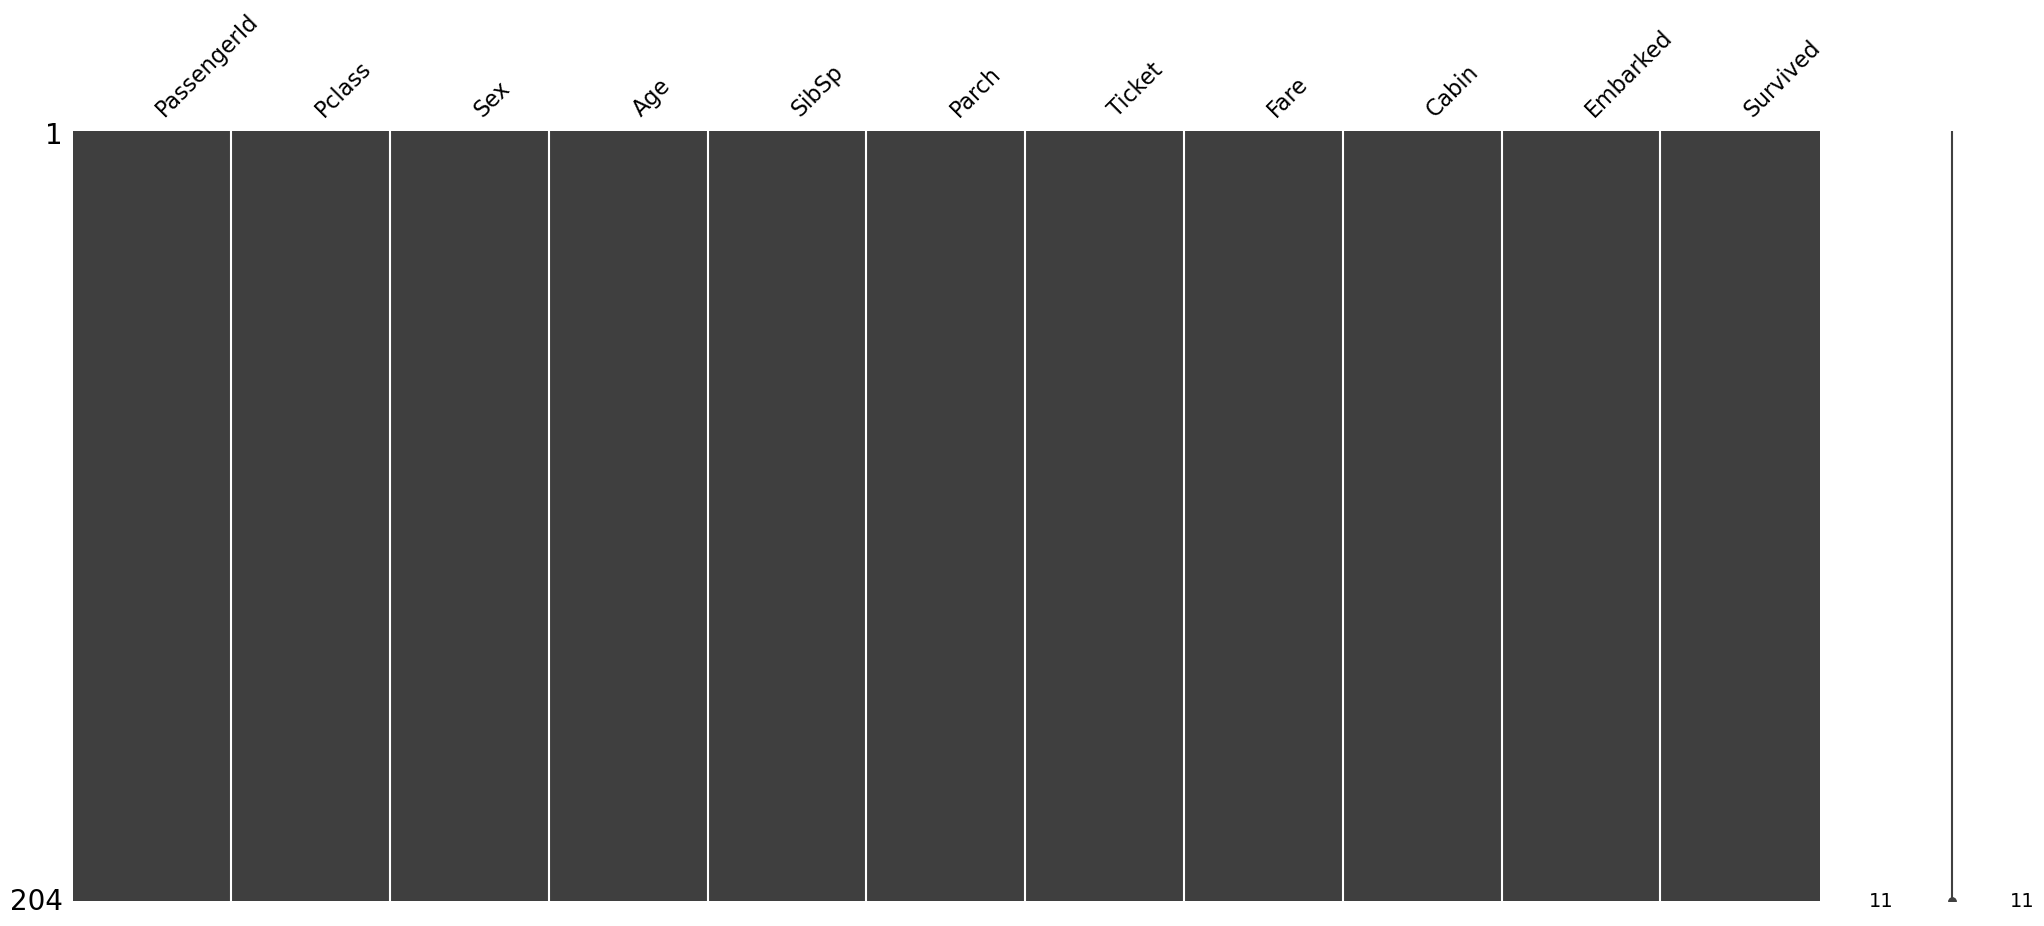

In [17]:
from sklearn.impute import SimpleImputer
from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer, PMM, SICE, MICE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Create an instance of MICE
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df2)
df_imputed = pd.DataFrame(imputed, columns=df2.columns)
msno.matrix(df_imputed)

X = df_imputed.drop(['Survived'], axis=1)

# Get the target variable
y = df_imputed['Survived']

## Feature Scaling

C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


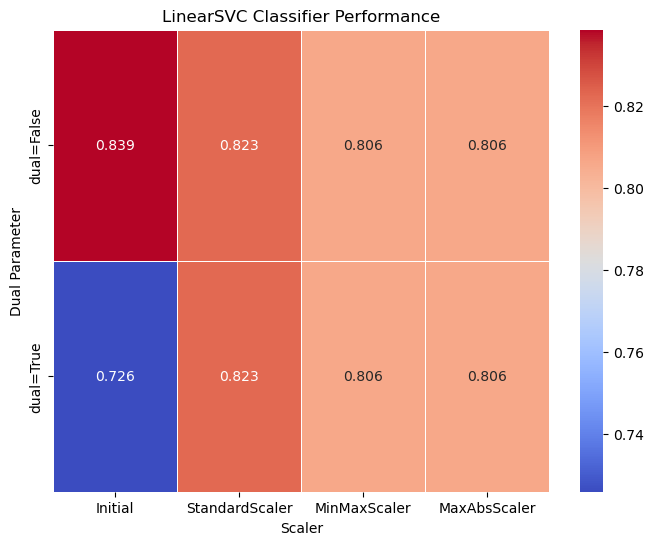

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test datasets

scalers = [None, StandardScaler(), MinMaxScaler(), MaxAbsScaler()]
dual_params = [False, True]

scores_data = []
for dual in dual_params:
    scores = {}
    for scaler in scalers:
        X_train_scaled = scaler.fit_transform(X_train) if scaler is not None else X_train
        X_test_scaled = scaler.transform(X_test) if scaler is not None else X_test
        col = scaler.__class__.__name__ if scaler is not None else 'Initial'

        clf = LinearSVC(random_state=42, dual=dual)
        clf.fit(X_train_scaled, y_train)

        scores[col] = clf.score(X_test_scaled, y_test)
    scores_data.append(scores)

table = pd.DataFrame(scores_data, index=['dual=False', 'dual=True'])

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(table, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('LinearSVC Classifier Performance')
plt.xlabel('Scaler')
plt.ylabel('Dual Parameter')
plt.show()


As seen, the best performance and accuracy is realized by Standard Scaler

## Feature selection

C:\Users\Max\AppData\Local\Temp\ipykernel_11856\3011314066.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

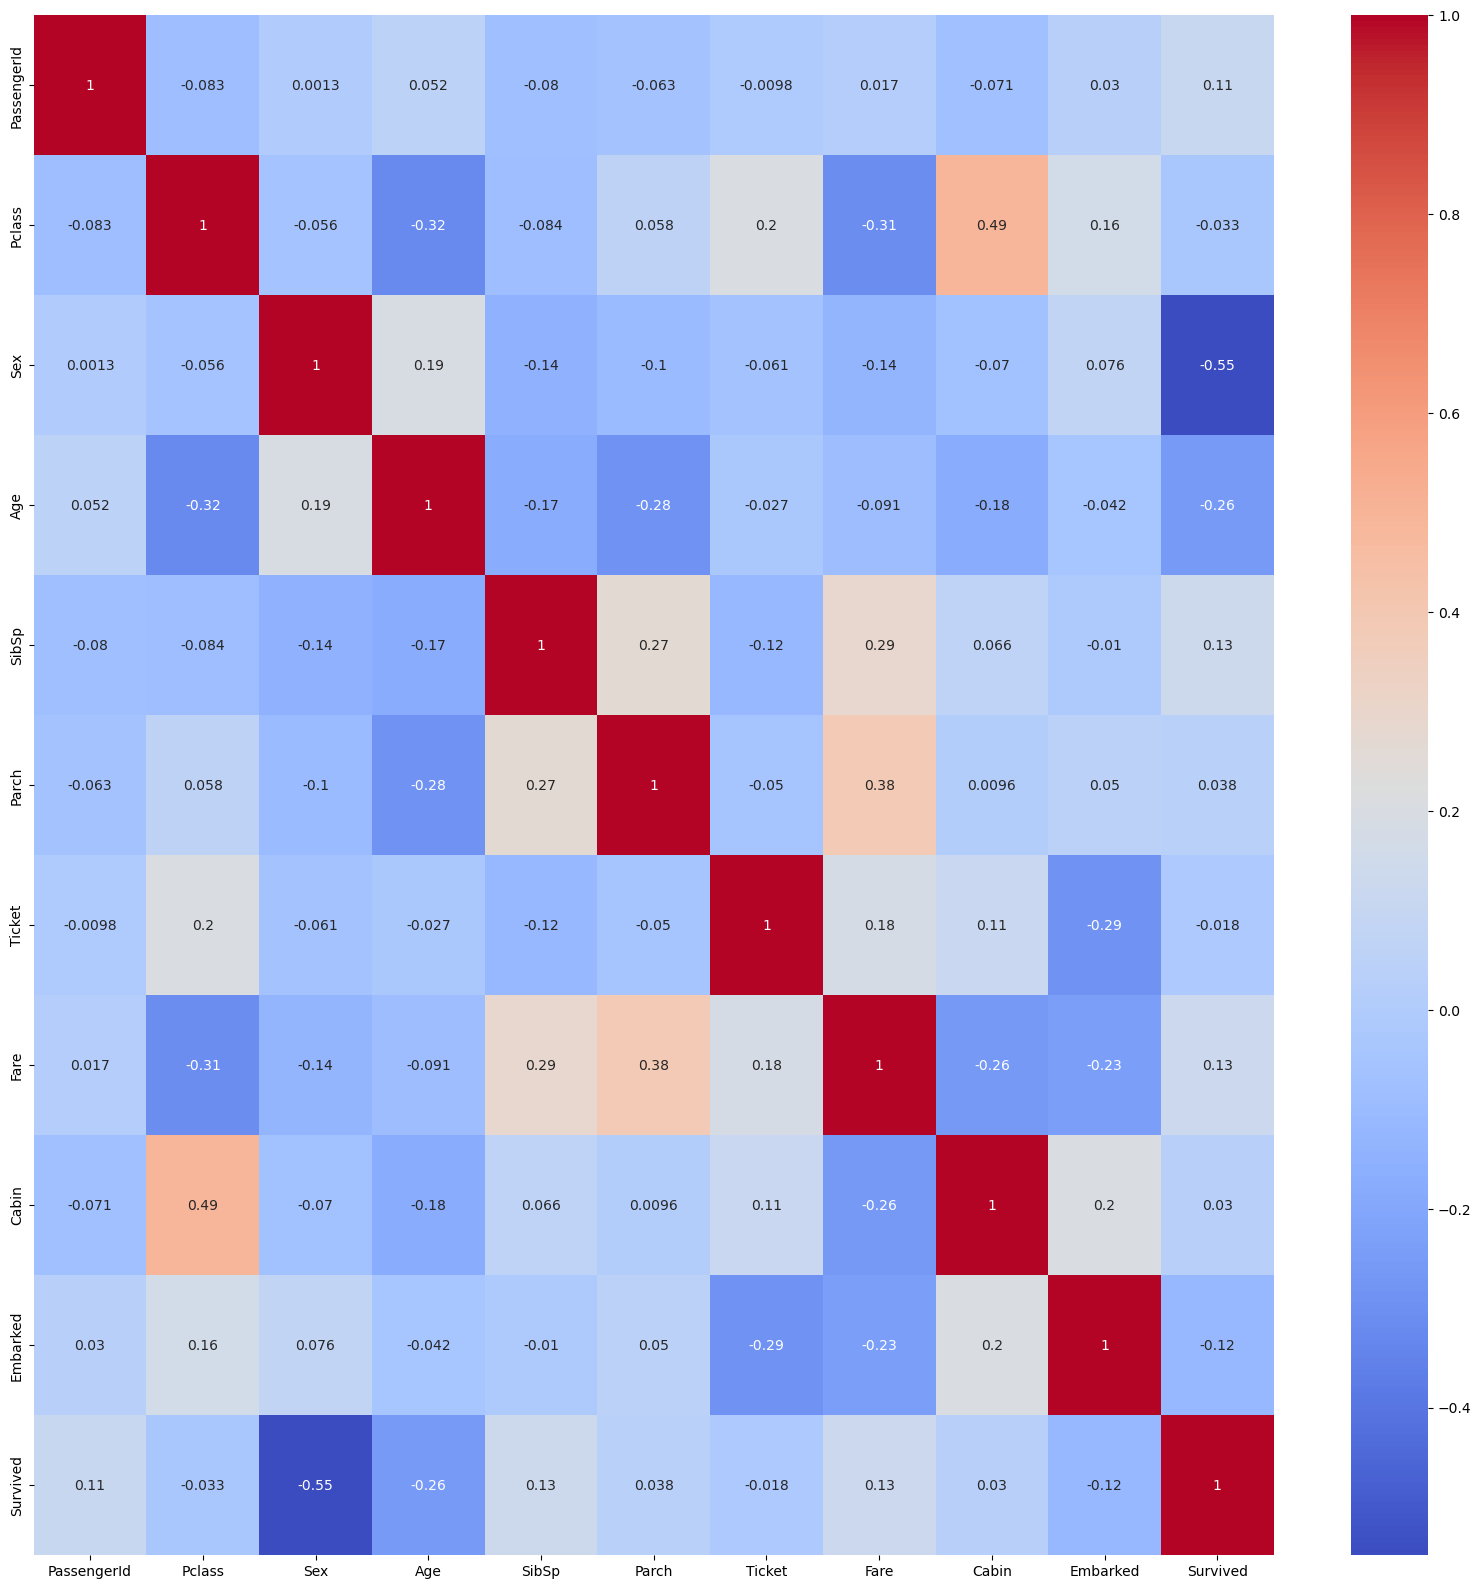

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(df_imputed.corr(),annot = True, cmap='coolwarm')

In [20]:
print(df_imputed.corr()["Survived"].sort_values(ascending=False))

Survived       1.000000
SibSp          0.132599
Fare           0.128306
PassengerId    0.110153
Parch          0.038081
Cabin          0.029619
Ticket        -0.017965
Pclass        -0.033032
Embarked      -0.116186
Age           -0.257883
Sex           -0.548320
Name: Survived, dtype: float64


In [22]:
features = ['Sex', 'Age']
X = df_imputed[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Boundaries

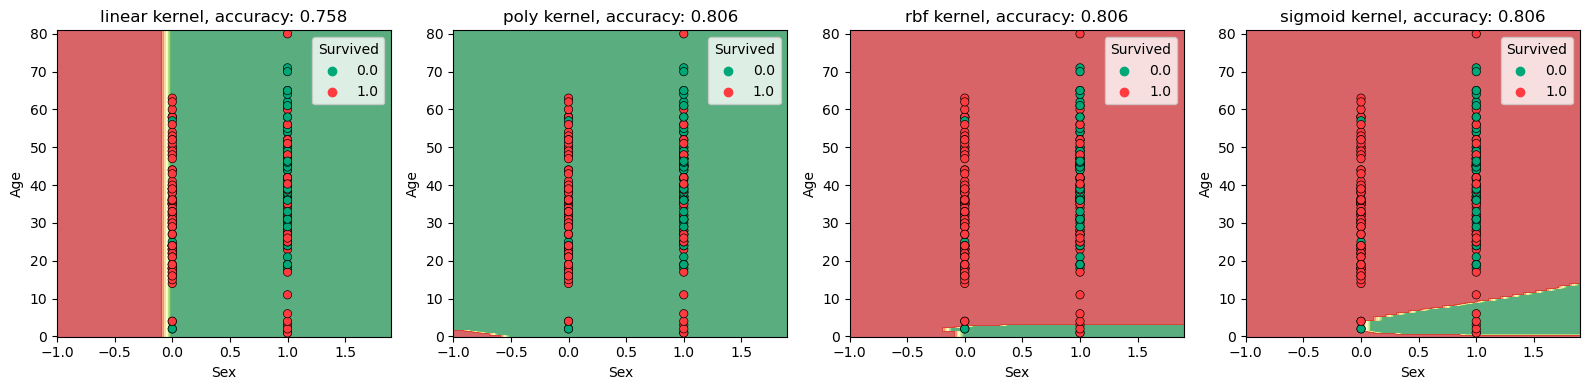

In [23]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

kernels = ['linear', 'poly',  'rbf', 'sigmoid']

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

min1, max1 = X['Sex'].min() - 1, X['Sex'].max() + 1
min2, max2 = X['Age'].min() - 1, X['Age'].max() + 1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
sns.set_palette(['#00A878', '#FF3B3F'])

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(grid)
    zz = y_pred.reshape(xx.shape)
    score = model.score(X_test_scaled, y_test)

    ax[i].contourf(xx, yy, zz, cmap='RdYlGn_r', alpha=0.7)
    ax[i].set_title(f'{kernel} kernel, accuracy: {score:.3f}')
    sns.scatterplot(x='Sex', y='Age', hue=y, data=df_imputed, edgecolor='k', ax=ax[i])

plt.tight_layout()
plt.show()

As seen, the most productive kernel is the "poly" one, along with "rbf" and "sigmoid". Linear kernel was the least effective with 0.758.